In [121]:
import os
from PIL import Image
from glob import glob
import json
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Polygon
from PIL import Image, ImageDraw
import numpy as np

img_folder = "/home/eric/data/military_data/tanks_20/image_splits"
ann_path = "/home/eric/data/military_data/tanks_20/roboflow/label/_annotations.coco.json"

In [122]:
img_list = sorted(glob(os.path.join(img_folder,"*.png")))

In [123]:
with open(ann_path, "r") as f:
    ann_data = json.load(f)

In [124]:
ann_data.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

In [126]:
img = Image.open('/home/eric/data/military_data/tanks_20/image_splits/001_top_right.png')

filename /home/eric/data/military_data/tanks_20/image_splits/001_top_right.png


In [189]:
ann_data["annotations"][2]

{'id': 2,
 'image_id': 1,
 'category_id': 1,
 'bbox': [607, 518, 40.72, 59.67],
 'area': 2429.762,
 'segmentation': [[607.36,
   517.745,
   648.08,
   517.745,
   648.08,
   577.415,
   607.36,
   577.415]],
 'iscrowd': 0}

In [ ]:

def make_polygon(segmentation,img_width,img_height):
    # Create a blank mask with the same size as the image
    mask = Image.new('L', (img_width, img_height), 0)  # Black mask

    # Convert segmentation points to integers and draw the polygon
    polygon_points = [(int(segmentation[i]), int(segmentation[i + 1])) for i in range(0, len(segmentation), 2)]
    ImageDraw.Draw(mask).polygon(polygon_points, outline=0, fill=255)  # Draw white polygon (value 1)

    # Convert the mask to a numpy array for visualization
    mask_array = np.array(mask)

    # Visualize the original image and the mask
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))

    # Original image with bounding box and segmentation
    ax[0].imshow(img)
    rect = Rectangle((data['bbox'][0], data['bbox'][1]), data['bbox'][2], data['bbox'][3],
                    linewidth=2, edgecolor='blue', facecolor='none', label='Bounding Box')
    ax[0].add_patch(rect)
    polygon = Polygon(polygon_points, closed=True, edgecolor='red', fill=False, linewidth=2, label='Segmentation')
    ax[0].add_patch(polygon)
    #ax[0].invert_yaxis()  # Invert y-axis
    ax[0].set_title('Original Image with Annotations')
    ax[0].legend()

    # Mask
    ax[1].imshow(mask_array, cmap='gray')
    ax[1].set_title('Polygon Mask')

    plt.show()

filename /home/eric/data/military_data/tanks_20/image_splits/001_top_right.png


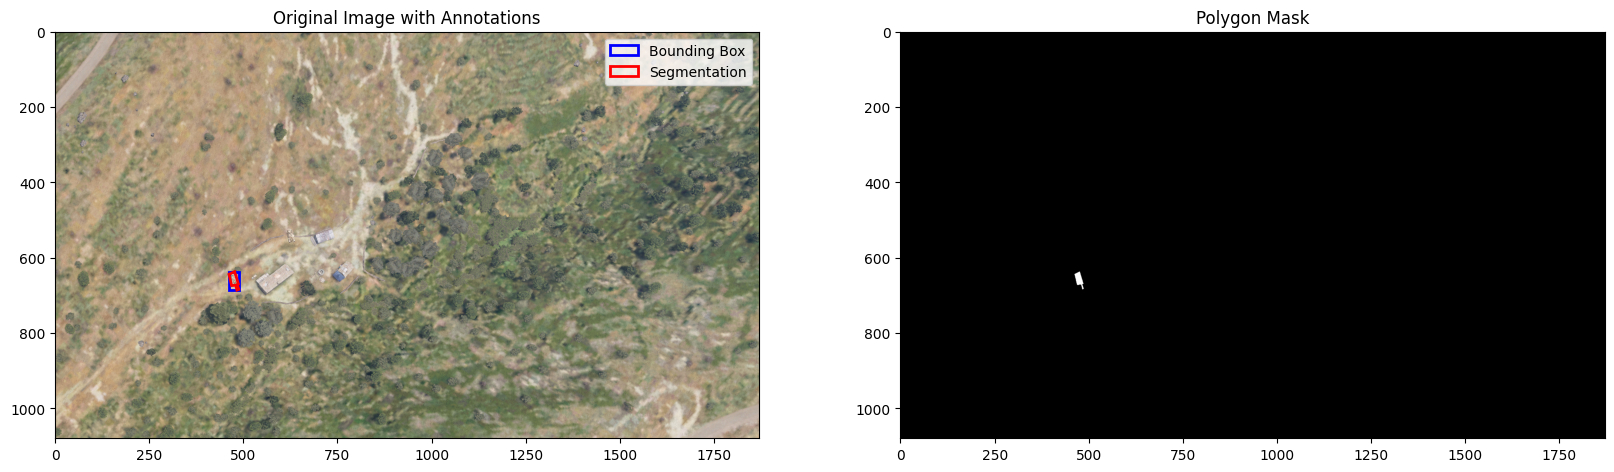

In [167]:
img = Image.open('/home/eric/data/military_data/tanks_20/image_splits/001_top_right.png')
img_width, img_height = img.size

data = ann_data["annotations"][5]

# Extract segmentation
segmentation = data['segmentation'][0]

make_polygon(segmentation)
# Save the mask if needed
#mask.save('/home/eric/data/military_data/tanks_20/mask/001_bottom_right.png')

In [ ]:
img = Image.open('/home/eric/data/military_data/tanks_20/image_splits/001_top_right.png')
img_width, img_height = img.size

for q in range(len(ann_data['annotations'])):
    
    img_id = ann_data['annotations'][q]['image_id']
    
    segmentation = ann_data['annotations'][q]['segmentation'][0]
    print("img_id : ", img_id)
    print(segmentation)
    
    mask = Image.new('L', (img_width, img_height), 0)  # Black mask

    # Convert segmentation points to integers and draw the polygon
    polygon_points = [(int(segmentation[i]), int(segmentation[i + 1])) for i in range(0, len(segmentation), 2)]
    # ImageDraw.Draw(mask).polygon(polygon_points, outline=0, fill=255)  # Draw white polygon (value 1)

    # # Convert the mask to a numpy array for visualization
    # mask_array = np.array(mask)

    # # Visualize the original image and the mask
    # fig, ax = plt.subplots(1, 2, figsize=(20, 10))

    # # Original image with bounding box and segmentation
    # ax[0].imshow(img)
    
    # polygon = Polygon(polygon_points, closed=True, edgecolor='red', fill=False, linewidth=2, label='Segmentation')
    # ax[0].add_patch(polygon)
    # #ax[0].invert_yaxis()  # Invert y-axis
    # ax[0].set_title('Original Image with Annotations')
    # ax[0].legend()
    # # Mask
    # ax[1].imshow(mask_array, cmap='gray')
    # ax[1].set_title('Polygon Mask')
    # plt.show()
    
    

filename /home/eric/data/military_data/tanks_20/image_splits/001_top_right.png
img_id :  0
[1142.004, 473.592, 1151.731, 511.087, 1163.841, 507.12, 1173.171, 529.339, 1176.744, 527.752, 1166.62, 505.731, 1172.774, 503.747, 1161.856, 466.053, 1141.607, 472.005]
img_id :  0
[1139.08, 463.015, 1184.88, 463.015, 1184.88, 530.325, 1139.08, 530.325]
img_id :  1
[607.36, 517.745, 648.08, 517.745, 648.08, 577.415, 607.36, 577.415]
img_id :  1
[618.468, 546.673, 617.845, 556.005, 620.958, 561.294, 630.141, 559.583, 635.588, 573.271, 638.234, 571.871, 632.942, 558.805, 637.767, 558.183, 634.965, 540.451, 629.674, 526.608, 616.133, 527.075, 612.242, 535.474]
img_id :  1
[456.96, 630.865, 499.98, 630.865, 499.98, 691.355, 456.96, 691.355]
img_id :  1
[462.454, 644.287, 469.872, 674.812, 480.126, 673.286, 483.835, 686.587, 488.635, 684.624, 484.053, 672.196, 487.326, 670.67, 477.945, 637.745]


In [171]:
len(data['segmentation'])

1

In [117]:
np.unique(mask_array)

array([  0, 255], dtype=uint8)

In [118]:
mask_s = Image.open("/home/eric/srcs/FewShotSeg_Lab/FewShotVision_Lab/SmallObjectFSS/SOFS/Open_Domain_Data/severstal_steel/support/mask/56de9f0d1_mask.png")

filename /home/eric/srcs/FewShotSeg_Lab/FewShotVision_Lab/SmallObjectFSS/SOFS/Open_Domain_Data/severstal_steel/support/mask/56de9f0d1_mask.png


In [119]:
np.unique( np.asarray(mask_s) )

array([  0, 255], dtype=uint8)